Step 1: Importing necessary libraries. However, we shall import remaining libraries once we open the required dataset and the needed alogorithms.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Flight_Booking.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Step 2: Exploratory Data Analysis

In [4]:
# Removing unnecessary columns.
df.drop(columns=['Unnamed: 0','flight'], axis=1, inplace=True)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [6]:
df.isna().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
df.shape

(300153, 10)

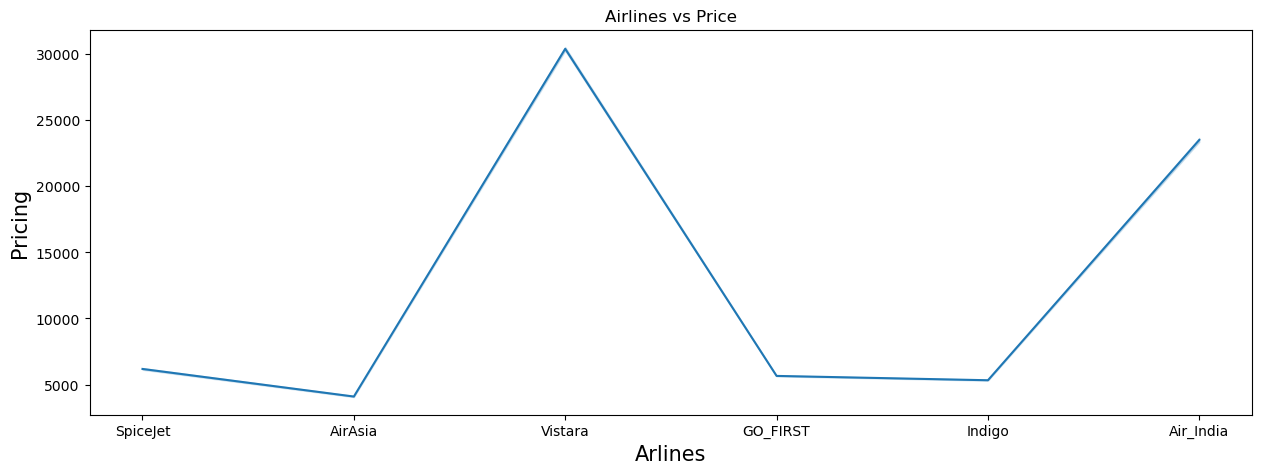

In [12]:
plt.figure(figsize= (15,5))
sns.lineplot(x = df.airline, y =df.price)
plt.title('Airlines vs Price')
plt.xlabel('Arlines', fontsize=15)
plt.ylabel('Pricing', fontsize=15)
plt.show()

# There is variation in pricing with Vistara being the expensive.

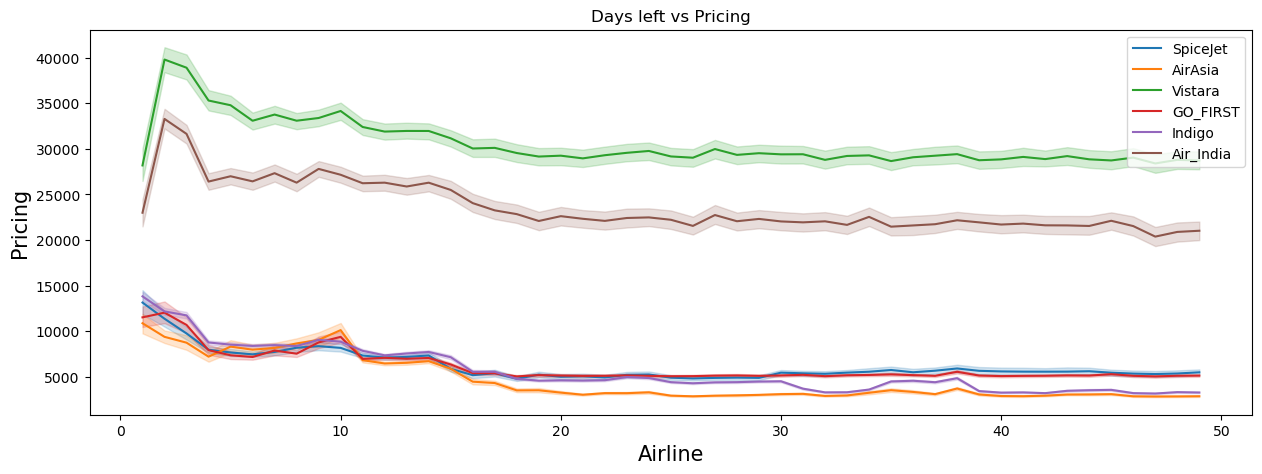

In [13]:
plt.figure(figsize= (15,5))
sns.lineplot(x=df.days_left, y = df.price, hue=df.airline)
plt.title('Days left vs Pricing')
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Pricing', fontsize=15)
plt.legend(loc='best')

# The price of the tickets hikes as the no of days descrease & this is noticable after 40 days or 10 days before departure. Again, with Vistara being costliest. 

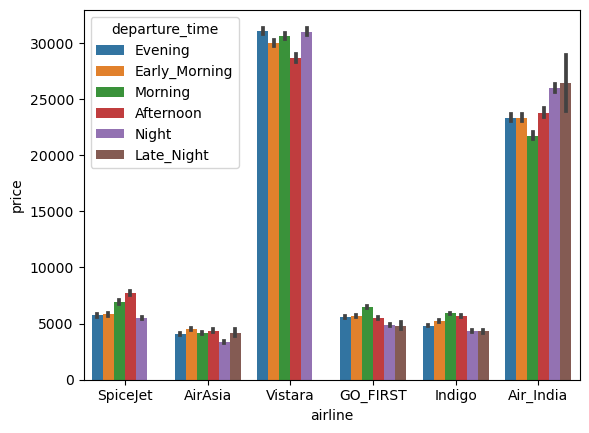

In [15]:
sns.barplot(y = df.price, x = df.airline, hue=df.departure_time)
plt.show()

# Pricing is different for departure time for each airlines. 

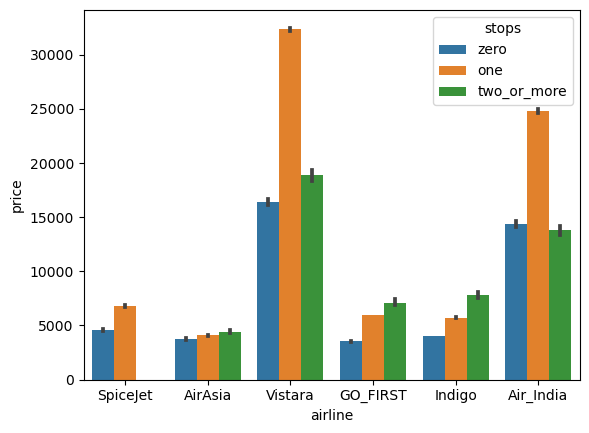

In [16]:
sns.barplot(y = df.price, x = df.airline, hue=df.stops)
plt.show()

# zero stop flights are inexpensive compared to other 2 with AirAisa being only exception with pretty consistent pricing & also being the least priced tickets.

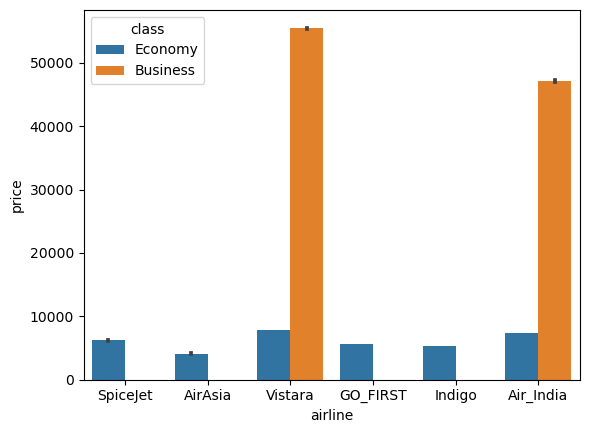

In [17]:
sns.barplot(y = df.price, x = df.airline, hue=df['class'])
plt.show()

# As expected business class is atleast 5-6 times more expensive than economy class. Again, vistara leading the chart. 

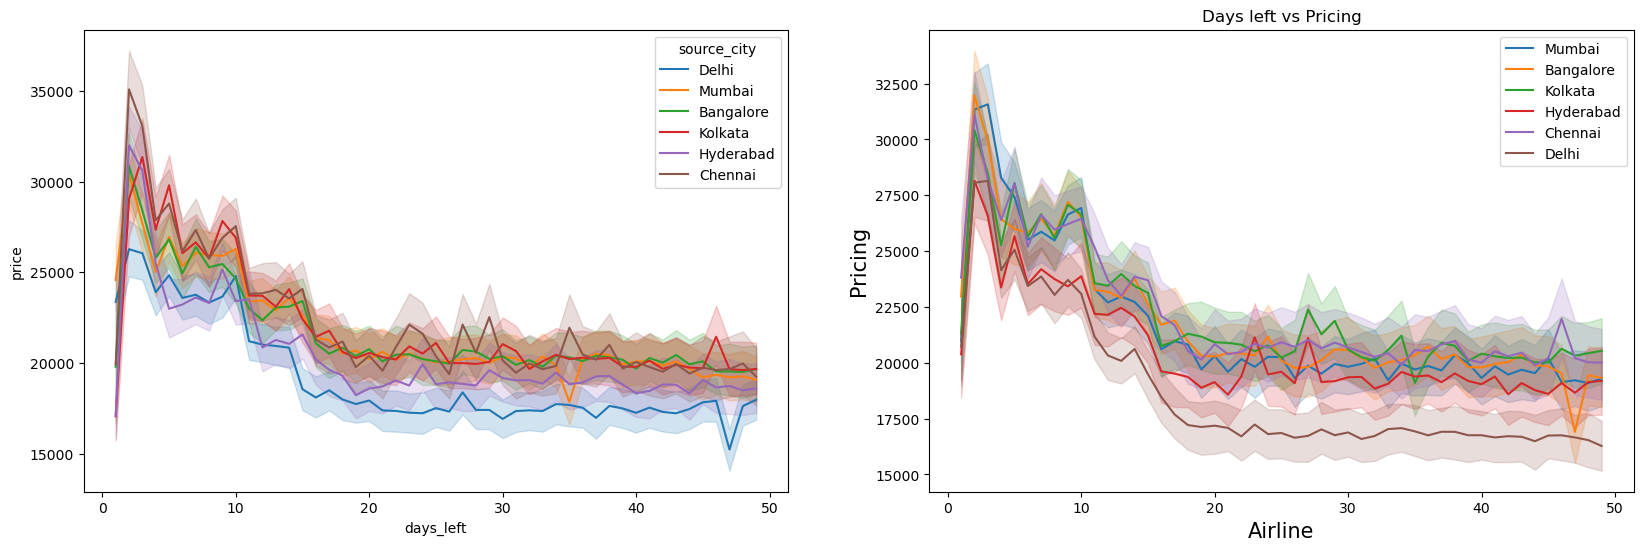

In [22]:
fig, axes = plt.subplots(1,2, figsize=(20,6)) 

sns.lineplot(x=df.days_left, y = df.price, hue=df.source_city, ax=axes[0])
sns.lineplot(x=df.days_left, y = df.price, hue=df.destination_city,ax=axes[1])
plt.title('Days left vs Pricing')
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Pricing', fontsize=15)
plt.legend(loc='best')
plt.show()

# Range of price of flights with source and destination city according to the days left

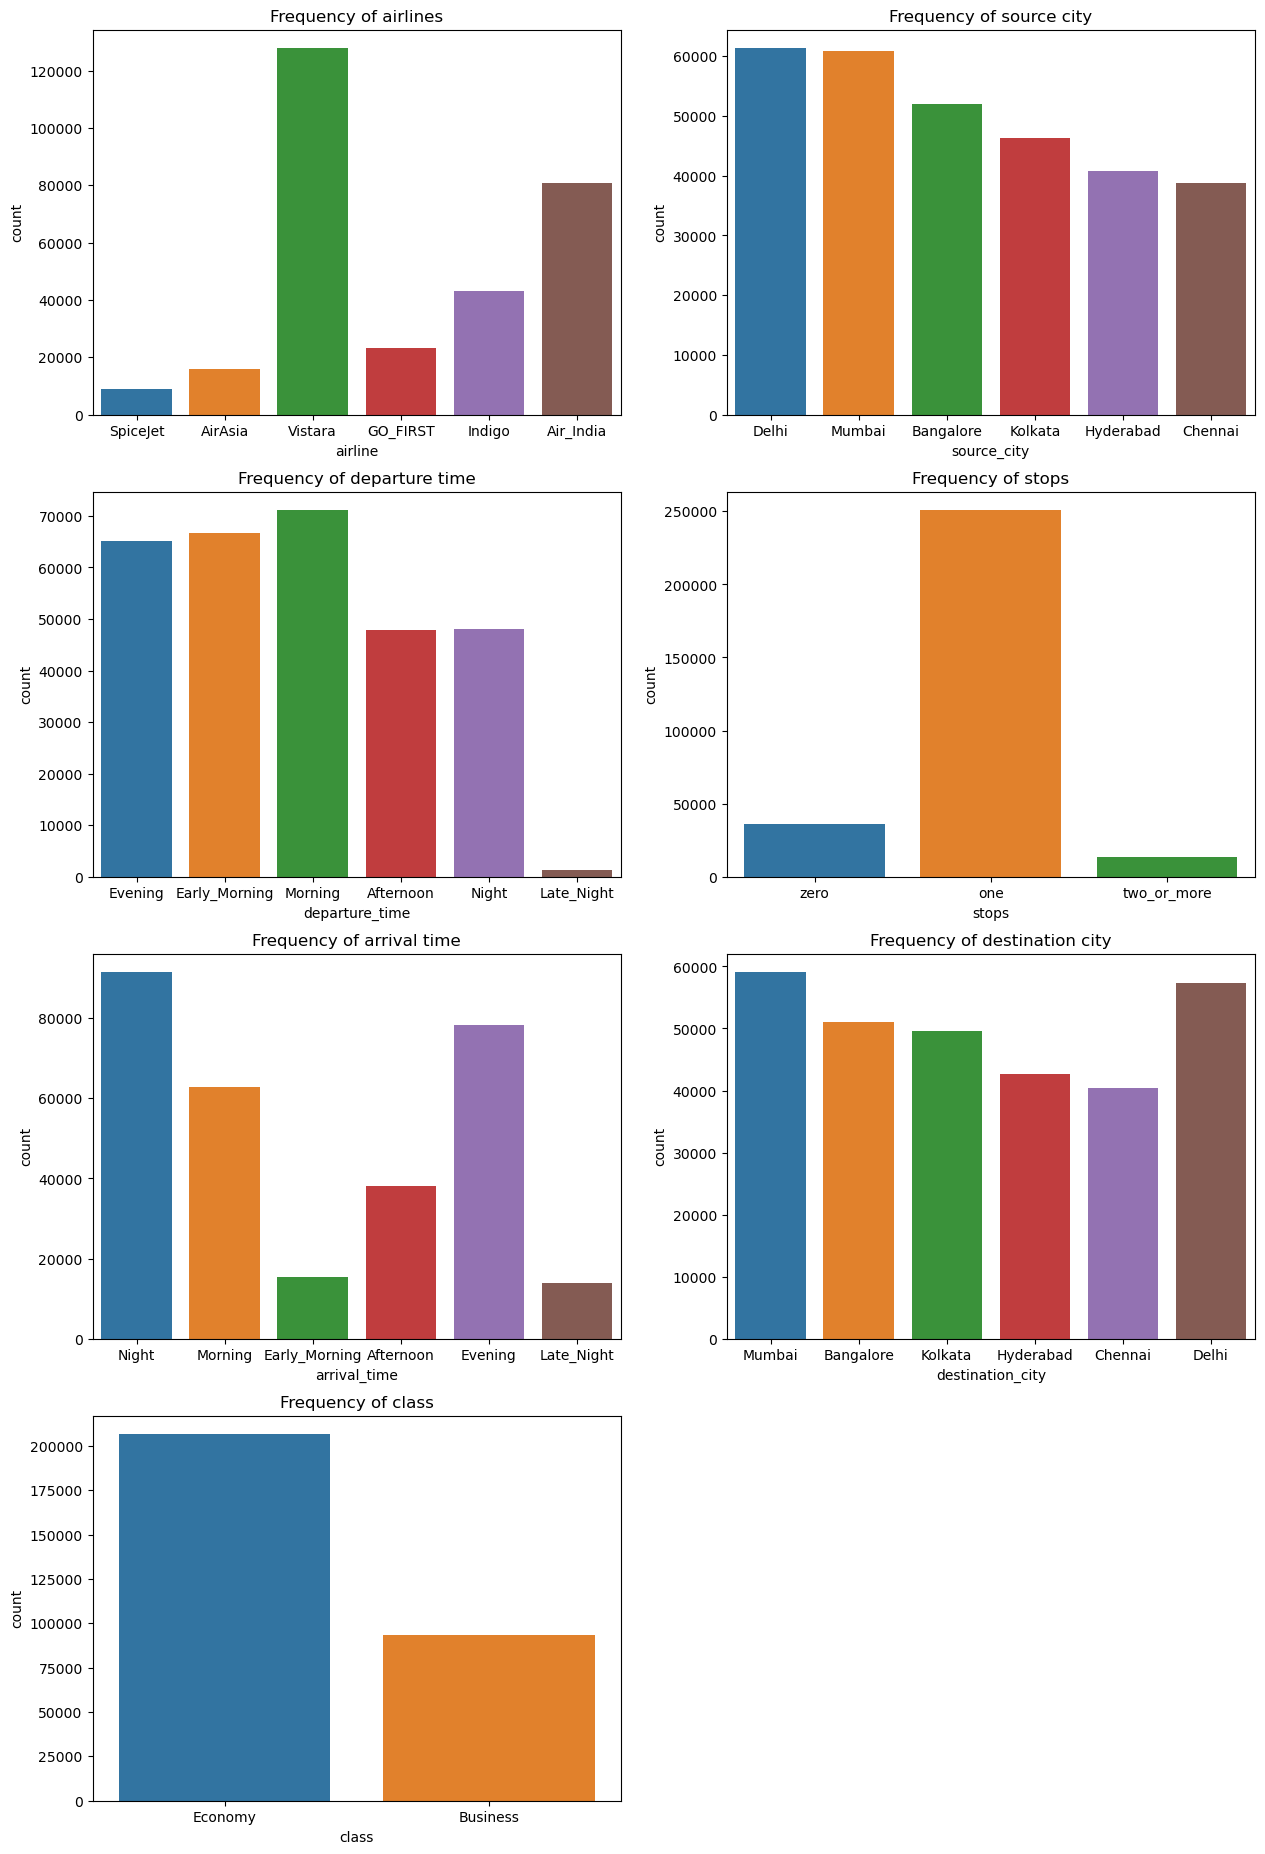

In [25]:
plt.figure(figsize = (15,23))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'])
plt.title('Frequency of airlines')

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'])
plt.title('Frequency of source city')

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'])
plt.title('Frequency of departure time')

plt.subplot(4,2,4)
sns.countplot(x=df['stops'])
plt.title('Frequency of stops')

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'])
plt.title('Frequency of arrival time')

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'])
plt.title('Frequency of destination city')

plt.subplot(4,2,7)
sns.countplot(x=df['class'])
plt.title('Frequency of class')

plt.show()

# Visualization of categorical features using countplot

In [27]:
# Performing One hot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtypes =='object':
        df[i] = le.fit_transform(df[i])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   source_city       300153 non-null  int32  
 2   departure_time    300153 non-null  int32  
 3   stops             300153 non-null  int32  
 4   arrival_time      300153 non-null  int32  
 5   destination_city  300153 non-null  int32  
 6   class             300153 non-null  int32  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2)
memory usage: 14.9 MB


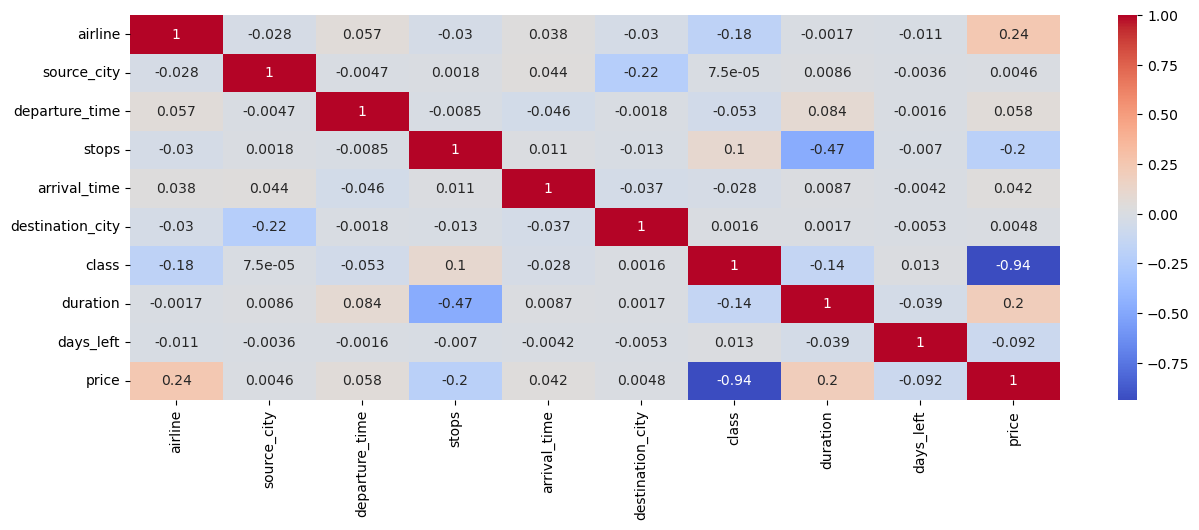

In [32]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')
plt.show()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_lst =[]

for i in df.columns:
    if ((df[i].dtypes!=object) & (i!='price')):
        col_lst.append(i)

x = df[col_lst]
vif = pd.DataFrame()
vif['features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
    
# VIF<5. Therefore, we shall not delete any columns/features.

,features,VIF
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


Step 3: This is an regression dataset with output being 'price'. Therefore, we shall import regression algorithms. Also we shall standardize the dataset.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [64]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [65]:
x_train,x_test, y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [66]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [72]:
lg = LinearRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
lg_r2 = r2_score(y_test,y_pred)

In [80]:
lg_mean_abs_error = mean_absolute_error(y_test,y_pred)
lg_mean_per_error = mean_absolute_percentage_error(y_test,y_pred)
lg_mean_sq_error = mean_squared_error(y_test,y_pred)
lg_root_mean_sq_error = np.sqrt(lg_mean_sq_error)
print('r2_score:', lg_r2)
print('lg_mean_abs_error:',lg_mean_abs_error)
print('lg_mean_per_error:',lg_mean_per_error)
print('lg_mean_sq_error:',lg_mean_sq_error)
print('lg_root_mean_sq_error:',lg_root_mean_sq_error)

# Lower the RMSE & MAPE better the model.

r2_score: 0.904554350718816
lg_mean_abs_error: 4624.994868016906
lg_mean_per_error: 0.4353581089683333
lg_mean_sq_error: 49200540.29372199
lg_root_mean_sq_error: 7014.3096804833185


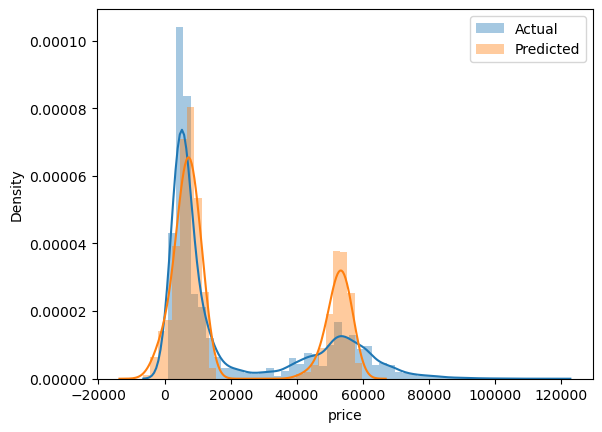

In [84]:
sns.distplot(y_test, label ='Actual')
sns.distplot(y_pred, label ='Predicted')
plt.legend()
plt.show()

In [ ]:
#  You can also use the below libraries to run regression tasks.

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR